<a href="https://colab.research.google.com/github/axk817/RIT_IMGS789/blob/main/HW2_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load MNIST dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

# Preprocess data
x_train = x_train.astype('float32') / 255.0
x_train = np.reshape(x_train, (len(x_train), 784))

In [ ]:
# Define the generator network
def create_generator():
  model = Sequential()
  model.add(Dense(128, activation='relu', input_dim=100))
  model.add(Dense(784, activation='sigmoid'))
  model.add(Reshape((28, 28)))
  return model

In [ ]:
# Define the discriminator network
def create_discriminator():
  model = Sequential()
  model.add(Flatten(input_shape=(28, 28)))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model

In [ ]:
# Create the generator and discriminator instances
generator = create_generator()
discriminator = create_discriminator()

# Define optimizers
optimizer_G = Adam(1e-4)
optimizer_D = Adam(1e-4)

In [ ]:
# Define the loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy()

# Define the discriminator loss
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss

# Define the generator loss
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)

In [ ]:
# Define the training loop
@tf.function
def train_step(images):
  noise = tf.random.normal([BATCH_SIZE, 100])

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training=True)

    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)

    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)

  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  optimizer_G.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  optimizer_D.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

  return gen_loss, disc_loss

In [ ]:
# Set training parameters
EPOCHS = 200
BATCH_SIZE = 256
noise_dim = 100
num_examples_to_generate = 16

# Seed for consistent results
seed = tf.random.normal([num_examples_to_generate, noise_dim])

# Training loop
def train(dataset, epochs):
  g_losses = []
  d_losses = []
  for epoch in range(epochs):
    for image_batch in dataset:
      # Reshape image_batch before passing to train_step
      image_batch = tf.reshape(image_batch, [-1, 28, 28])  # Reshape to (batch_size, 28, 28)
      gen_loss, disc_loss = train_step(image_batch)
      g_losses.append(gen_loss.numpy())
      d_losses.append(disc_loss.numpy())

    print ('Epoch {}: Generator Loss: {}, Discriminator Loss: {}'.format(epoch+1, gen_loss.numpy(), disc_loss.numpy()))

    # Generate images for visualization
    generate_and_save_images(generator, epoch + 1, seed)

  return g_losses, d_losses

In [ ]:
# Generate and save images
def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      # Assuming predictions is (batch_size, height, width, channels) and grayscale
      # remove the last index [0]
      plt.imshow(predictions[i, :, :] * 255.0, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
# Create batched dataset
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(BATCH_SIZE)

Epoch 1: Generator Loss: 2.7696566581726074, Discriminator Loss: 0.2940514087677002


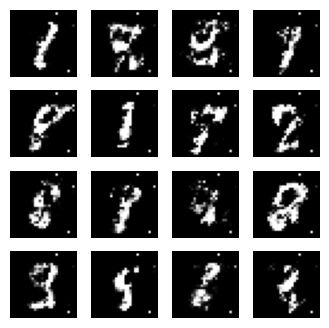

Epoch 2: Generator Loss: 3.024477958679199, Discriminator Loss: 0.228715717792511


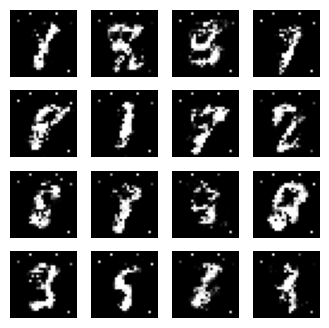

Epoch 3: Generator Loss: 2.364903688430786, Discriminator Loss: 0.42449867725372314


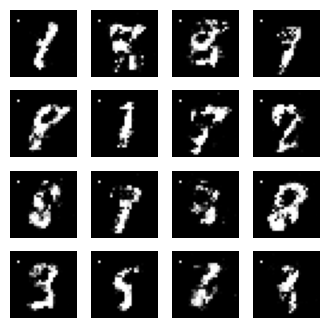

Epoch 4: Generator Loss: 3.0386693477630615, Discriminator Loss: 0.2564324140548706


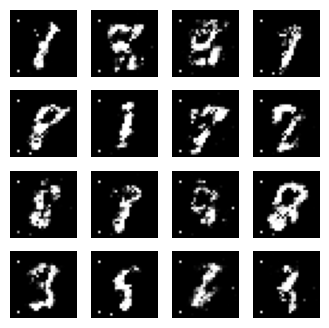

Epoch 5: Generator Loss: 3.256922960281372, Discriminator Loss: 0.2154838591814041


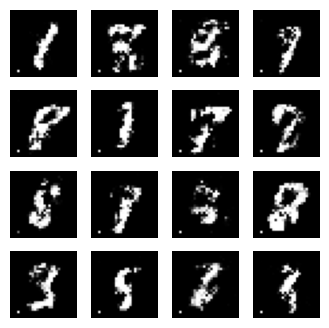

Epoch 6: Generator Loss: 2.597524404525757, Discriminator Loss: 0.4168661832809448


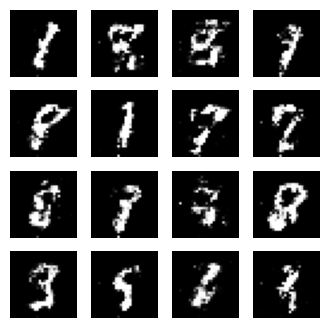

Epoch 7: Generator Loss: 2.797614812850952, Discriminator Loss: 0.33676740527153015


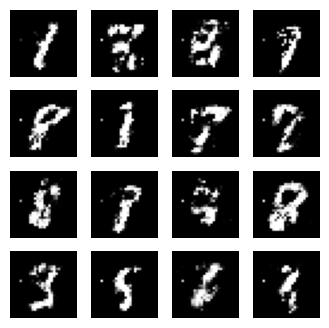

Epoch 8: Generator Loss: 3.146571159362793, Discriminator Loss: 0.24214419722557068


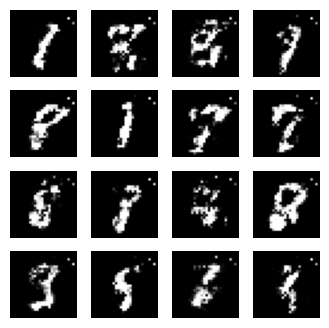

Epoch 9: Generator Loss: 2.6884613037109375, Discriminator Loss: 0.4224186837673187


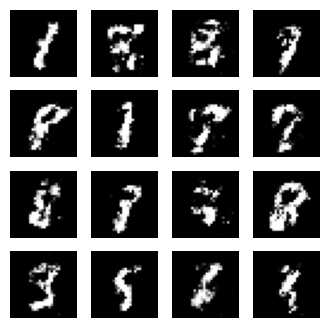

Epoch 10: Generator Loss: 2.282547950744629, Discriminator Loss: 0.5578510761260986


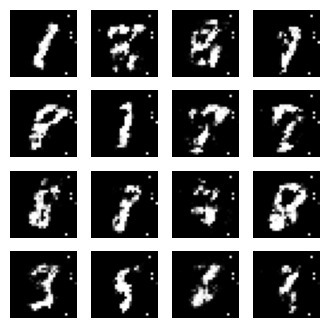

Epoch 11: Generator Loss: 3.4285924434661865, Discriminator Loss: 0.2901930510997772


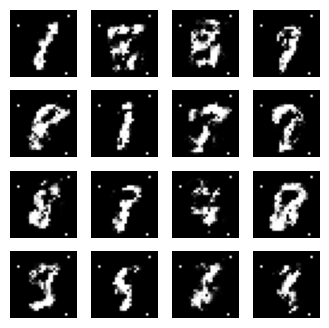

Epoch 12: Generator Loss: 3.332510471343994, Discriminator Loss: 0.2581787705421448


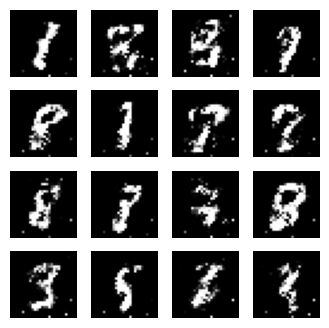

Epoch 13: Generator Loss: 2.8639936447143555, Discriminator Loss: 0.3265626132488251


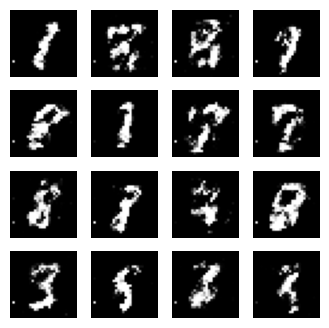

Epoch 14: Generator Loss: 2.4597113132476807, Discriminator Loss: 0.44111955165863037


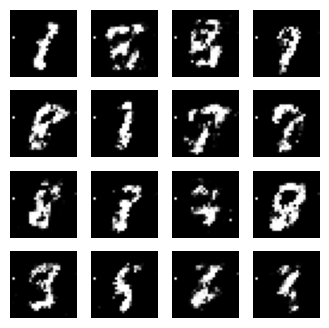

Epoch 15: Generator Loss: 2.944774627685547, Discriminator Loss: 0.2620174288749695


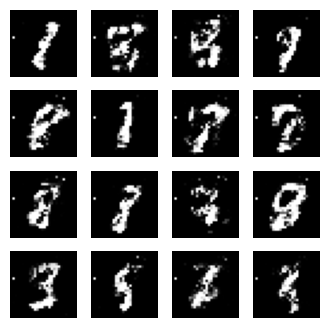

Epoch 16: Generator Loss: 2.8058536052703857, Discriminator Loss: 0.3802116811275482


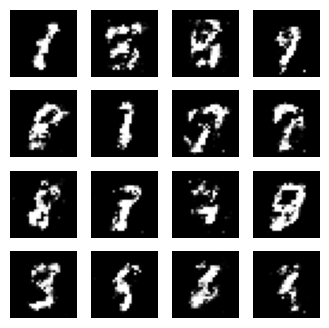

Epoch 17: Generator Loss: 2.391852855682373, Discriminator Loss: 0.5708155035972595


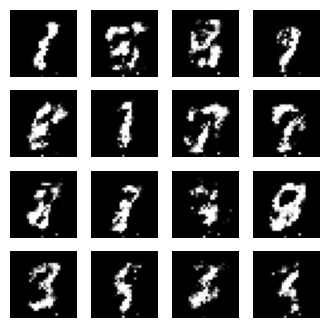

Epoch 18: Generator Loss: 2.394131660461426, Discriminator Loss: 0.48359405994415283


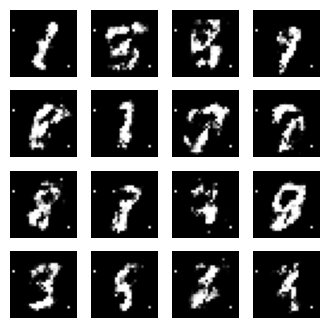

Epoch 19: Generator Loss: 2.4929354190826416, Discriminator Loss: 0.4627685546875


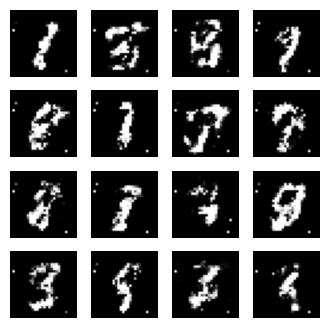

Epoch 20: Generator Loss: 2.551470994949341, Discriminator Loss: 0.44489264488220215


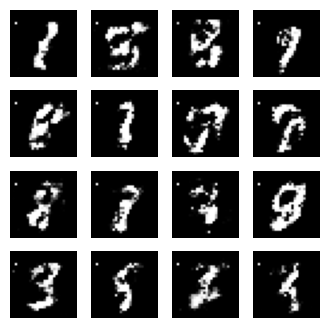

Epoch 21: Generator Loss: 2.981299877166748, Discriminator Loss: 0.3679700493812561


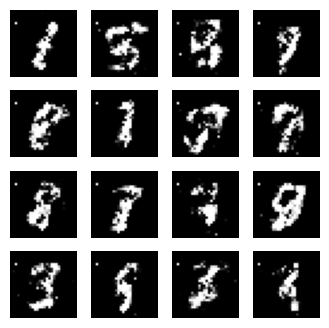

Epoch 22: Generator Loss: 2.943822145462036, Discriminator Loss: 0.33791467547416687


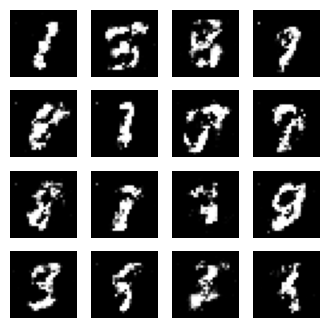

Epoch 23: Generator Loss: 2.6678574085235596, Discriminator Loss: 0.4271848797798157


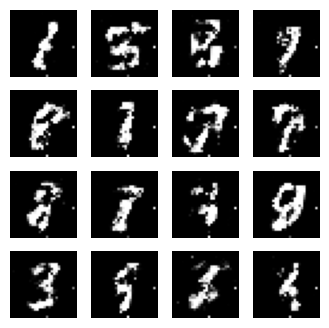

Epoch 24: Generator Loss: 2.5552468299865723, Discriminator Loss: 0.44501858949661255


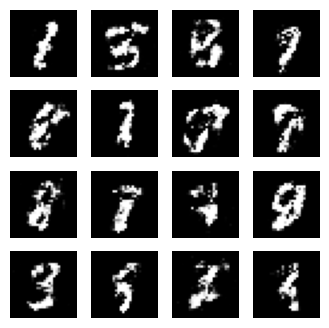

Epoch 25: Generator Loss: 2.6067421436309814, Discriminator Loss: 0.42595532536506653


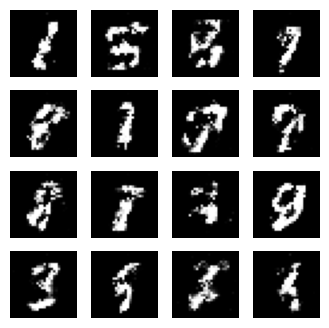

Epoch 26: Generator Loss: 2.450685501098633, Discriminator Loss: 0.44176793098449707


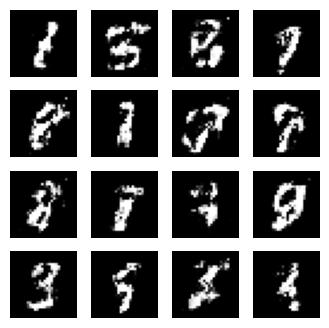

Epoch 27: Generator Loss: 2.5091958045959473, Discriminator Loss: 0.42464199662208557


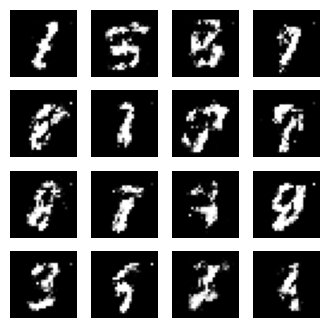

Epoch 28: Generator Loss: 2.966442823410034, Discriminator Loss: 0.2856571674346924


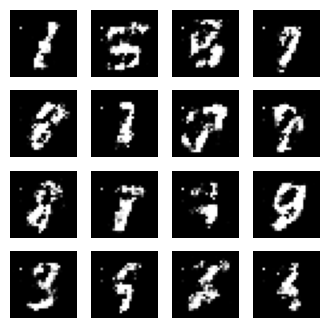

Epoch 29: Generator Loss: 2.7938122749328613, Discriminator Loss: 0.36000722646713257


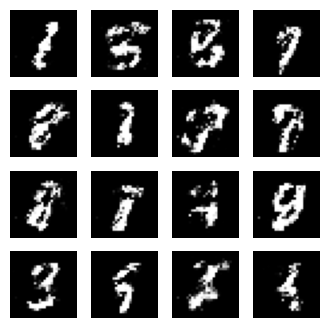

Epoch 30: Generator Loss: 2.41723895072937, Discriminator Loss: 0.42752259969711304


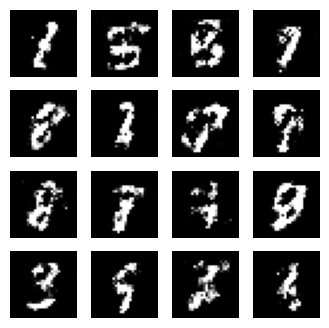

Epoch 31: Generator Loss: 2.5837924480438232, Discriminator Loss: 0.34822577238082886


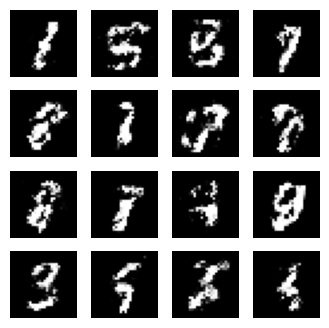

Epoch 32: Generator Loss: 2.6192331314086914, Discriminator Loss: 0.3761974573135376


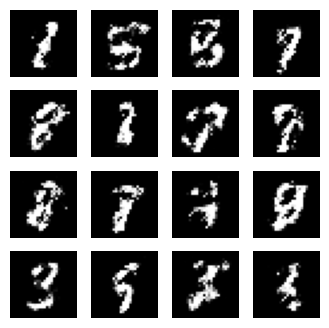

Epoch 33: Generator Loss: 2.6158971786499023, Discriminator Loss: 0.42895060777664185


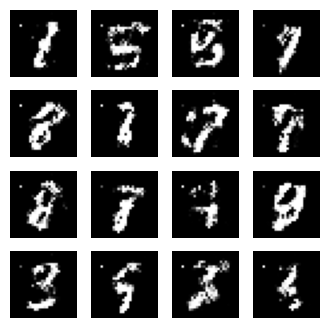

Epoch 34: Generator Loss: 2.885950803756714, Discriminator Loss: 0.34772181510925293


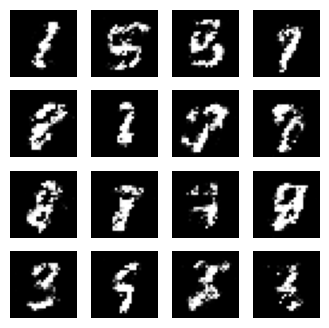

Epoch 35: Generator Loss: 2.594485282897949, Discriminator Loss: 0.3982201814651489


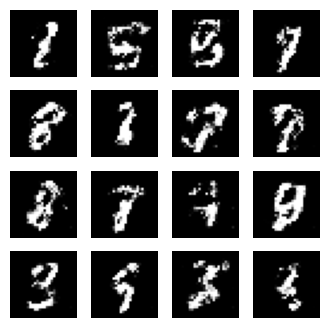

Epoch 36: Generator Loss: 2.5833146572113037, Discriminator Loss: 0.4562656879425049


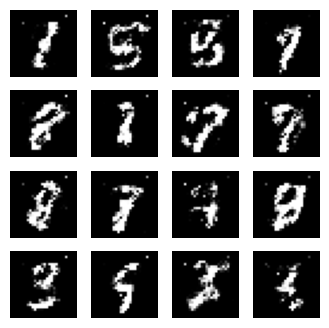

Epoch 37: Generator Loss: 2.6510627269744873, Discriminator Loss: 0.3367689847946167


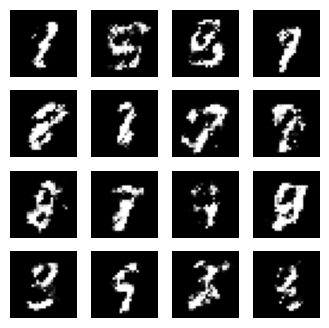

Epoch 38: Generator Loss: 2.4161484241485596, Discriminator Loss: 0.4967394471168518


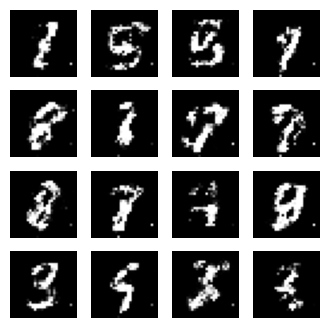

Epoch 39: Generator Loss: 2.662275552749634, Discriminator Loss: 0.355901300907135


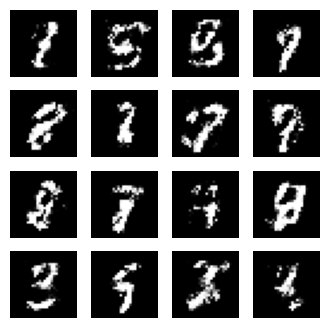

Epoch 40: Generator Loss: 2.6182656288146973, Discriminator Loss: 0.401380717754364


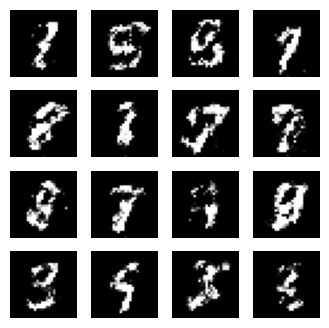

Epoch 41: Generator Loss: 2.635143756866455, Discriminator Loss: 0.41775721311569214


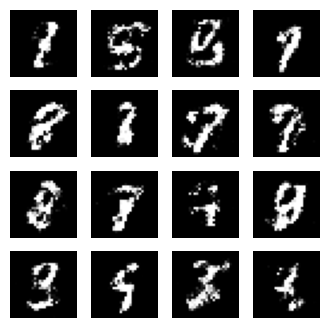

Epoch 42: Generator Loss: 2.6328556537628174, Discriminator Loss: 0.366727352142334


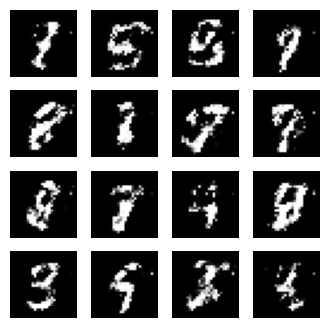

Epoch 43: Generator Loss: 2.5714221000671387, Discriminator Loss: 0.443989634513855


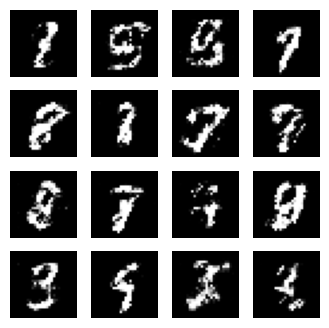

Epoch 44: Generator Loss: 2.5353798866271973, Discriminator Loss: 0.3838266432285309


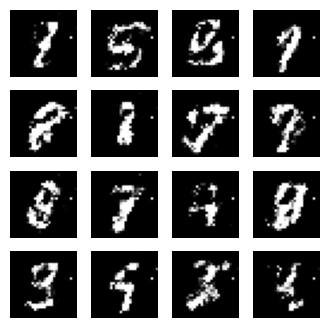

Epoch 45: Generator Loss: 2.8425652980804443, Discriminator Loss: 0.3710917830467224


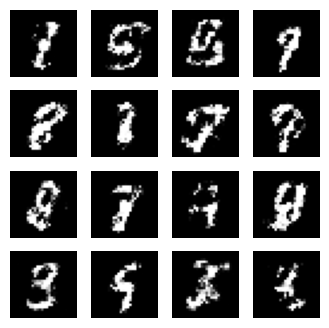

Epoch 46: Generator Loss: 2.50872802734375, Discriminator Loss: 0.3878561556339264


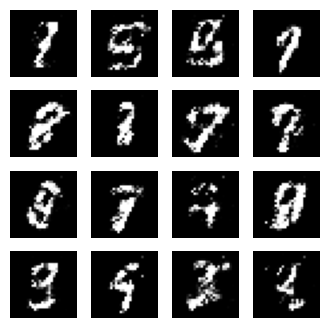

Epoch 47: Generator Loss: 2.55916690826416, Discriminator Loss: 0.3625922203063965


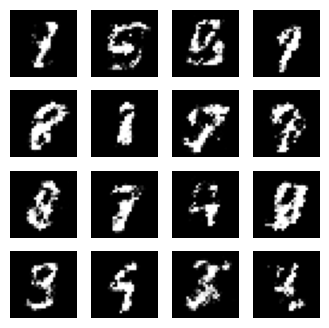

Epoch 48: Generator Loss: 2.657468795776367, Discriminator Loss: 0.3085491359233856


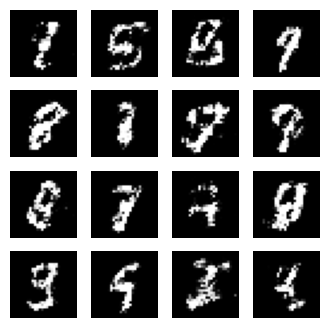

Epoch 49: Generator Loss: 2.5278091430664062, Discriminator Loss: 0.40548568964004517


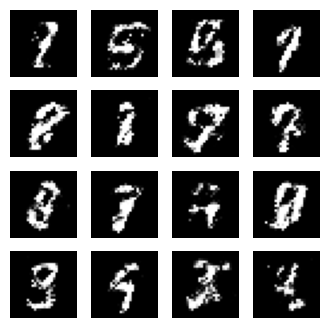

Epoch 50: Generator Loss: 2.659586191177368, Discriminator Loss: 0.3236747980117798


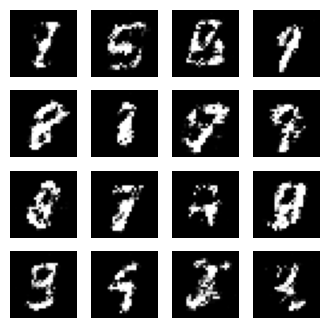

Epoch 51: Generator Loss: 2.5614235401153564, Discriminator Loss: 0.3188367187976837


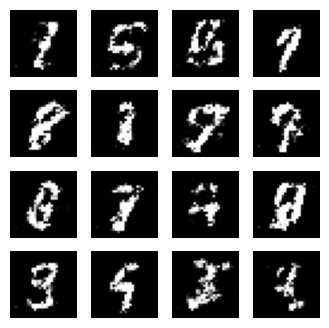

Epoch 52: Generator Loss: 2.8131418228149414, Discriminator Loss: 0.34619849920272827


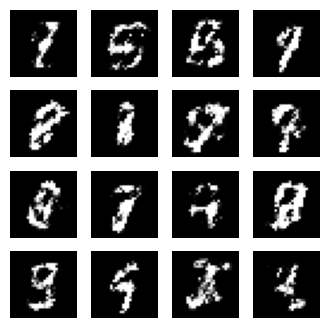

Epoch 53: Generator Loss: 2.7241079807281494, Discriminator Loss: 0.3960222005844116


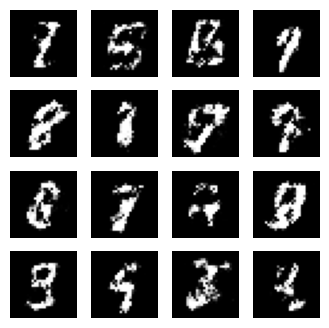

Epoch 54: Generator Loss: 2.5491788387298584, Discriminator Loss: 0.3715100884437561


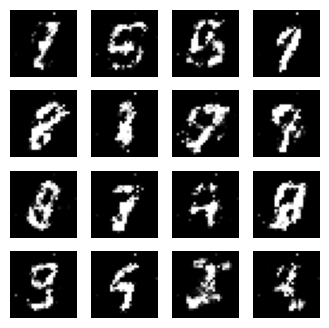

Epoch 55: Generator Loss: 2.050149440765381, Discriminator Loss: 0.6601500511169434


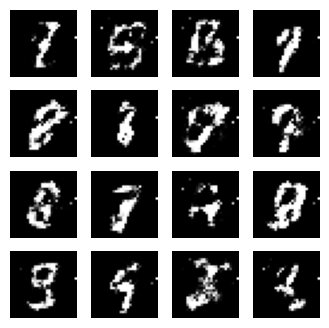

Epoch 56: Generator Loss: 2.9961326122283936, Discriminator Loss: 0.28589117527008057


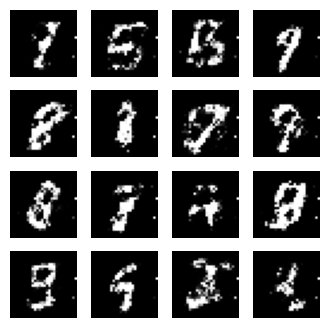

Epoch 57: Generator Loss: 2.797539234161377, Discriminator Loss: 0.47607120871543884


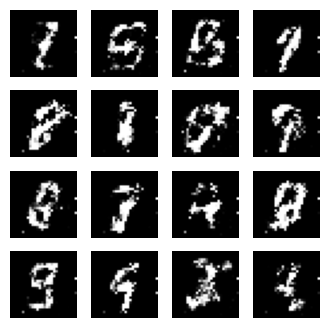

Epoch 58: Generator Loss: 2.8117005825042725, Discriminator Loss: 0.29779502749443054


KeyboardInterrupt: 

In [ ]:
# Train the GAN
g_losses, d_losses = train(train_dataset, EPOCHS)

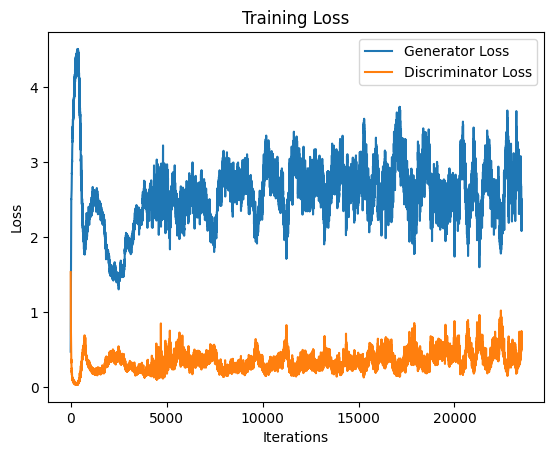

In [ ]:
# Plot the loss curves
plt.plot(g_losses, label='Generator Loss')
plt.plot(d_losses, label='Discriminator Loss')
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()